In [ ]:
# !pip install networkx
# !pip install matplotlib
# !pip install pandas

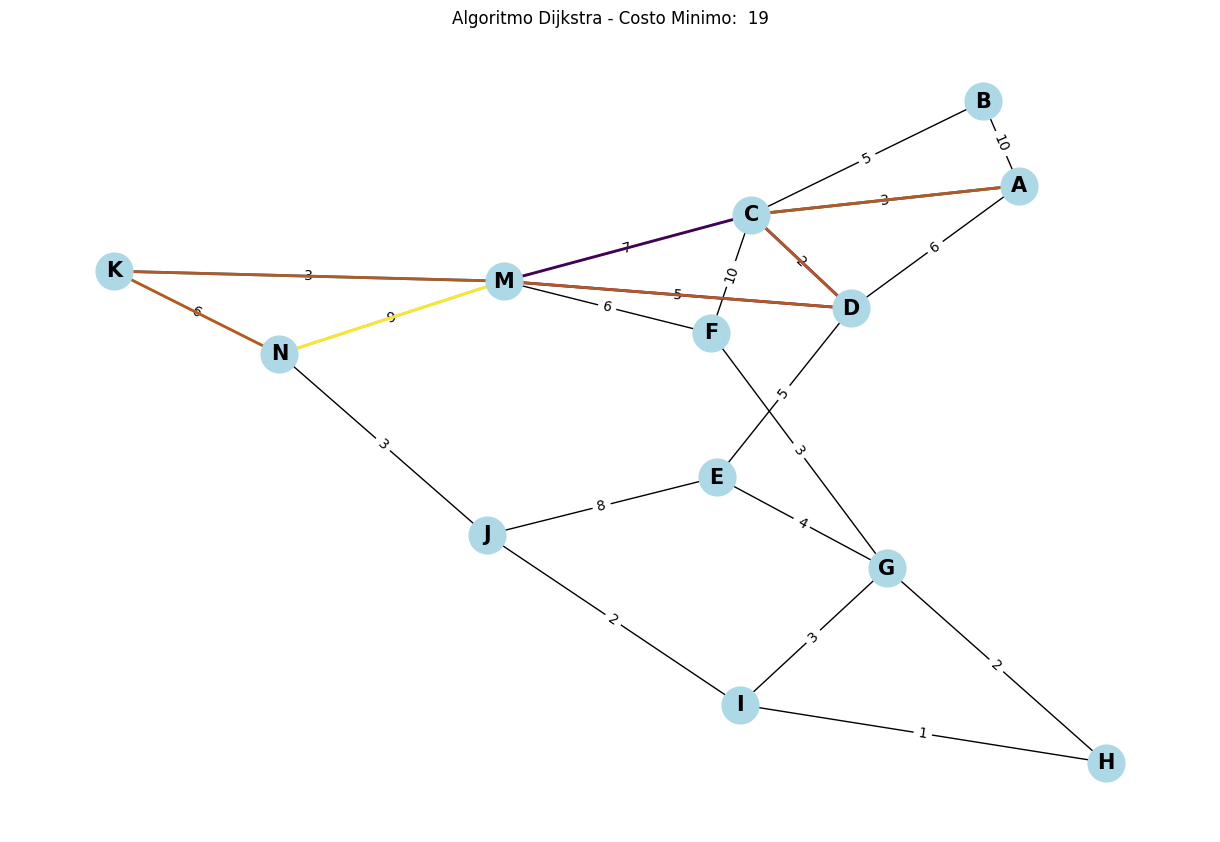

        Camino  Costo
0      A-C-M-N     19
1    A-C-D-M-N     19
2    A-C-M-K-N     19
3  A-C-D-M-K-N     19


In [10]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors as mcolors

grafo = nx.Graph()

nodos = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "M", "N"]
aristas = [("A", "B", 10), ("A", "C", 3), ("A", "D", 6), ("B", "C", 5), ("C", "D", 2), 
           ("C", "M", 7), ("C", "F", 10), ("D", "E", 5), ("D", "M", 5), ("M", "F", 6), 
           ("M", "K", 3), ("M", "N", 9), ("K", "N", 6), ("N", "J", 3), ("E", "J", 8),
           ("E", "G", 4), ("G", "F", 3), ("G", "I", 3), ("G", "H", 2), ("H", "I", 1), ("I", "J", 2)]

grafo.add_nodes_from(nodos)
grafo.add_weighted_edges_from(aristas)

nodo_inicio = "A"
nodo_final = "N"

# encontramos todos los caminos  y su costo
todos_los_caminos = list(nx.all_shortest_paths(grafo, source=nodo_inicio, target=nodo_final, weight='weight'))
costo_minimo = nx.shortest_path_length(grafo, source=nodo_inicio, target=nodo_final, weight='weight')

tabla_caminos = pd.DataFrame({
    "Camino": ["-".join(camino) for camino in todos_los_caminos],
    "Costo": [costo_minimo] * len(todos_los_caminos)
})

# vemos el grafo con caminos minimos destacados
posiciones = nx.spring_layout(grafo)
plt.figure(figsize=(12, 8))
nx.draw(grafo, posiciones, with_labels=True, node_color='lightblue', node_size=700, font_size=15, font_weight='bold')
nx.draw_networkx_edge_labels(grafo, posiciones, edge_labels={(u, v): d['weight'] for u, v, d in grafo.edges(data=True)})

""" 
usamos matplotlib colors para tener una variedad de colores en las aristas que 
son los mejores caminos
posibles usos:
    Accent
    Dark2
    Paired
    Pastel1
    Set1
    Spectral
"""
colores = plt.get_cmap('Paired', len(todos_los_caminos))

# resaltamos de rojo los mejores caminos
# los diferenciamos con la tabla de caminos :)
for i, camino in enumerate(todos_los_caminos):
    aristas_en_camino = list(zip(camino[:-1], camino[1:]))
    nx.draw_networkx_edges(grafo, posiciones, edgelist=aristas_en_camino, width=2, edge_color=colores(i))

plt.title(f"Algoritmo Dijkstra - Costo Minimo:  {costo_minimo}")
plt.show()

print(tabla_caminos)
